## Exploratory Data Analysis for Metadata

#### Import data

In [3]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

C:\Users\henry\AppData\Local\Temp\ipykernel_17604\1582991288.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [4]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [5]:
brain_counts_file = os.path.join(data_path, "brain_counts.csv")
brain_metadata_file = os.path.join(data_path, "brain_metadata.csv")

In [6]:
df_counts = pd.read_csv(brain_counts_file)
df_metadata = pd.read_csv(brain_metadata_file)

## Analyze and Describe data

Metadata is "data about data." In this dataset, it provides descriptive, structural, and administrative information about a mice laboratory gene and RNA experiment, where it was collected cellular and RNA decomposition information from 3401 male and female population.

The dimension of the data is 3401 observation for 6 different variables. This information belongs to the decsription of the the brain extracted mices cells

In [7]:
print("Dimension of DataFrame:", df_metadata.shape)

Dimension of DataFrame: (3401, 6)


All columns are of type object (string/text), meaning they contain categorical data. Below is an overview of each column:

- **cell**: Identifies individual cells in the dataset. Each row corresponds to a unique cell.
- **cell_ontology_class**: Specifies the ontology classification of each cell, likely indicating its biological type or function.
- **subtissue**: Describes the specific tissue or sub-region from which the cell was extracted.
- **mouse.sex:** Indicates the sex of the mouse (e.g., "male" or "female").
- **mouse.id:** A unique identifier for each mouse in the study. Multiple cells may belong to the same mouse.
- **plate.barcode:** A barcode identifier for the plate used in the experiment, which can help track batch effects or technical variations.

In [8]:
print("📊 Information of DataFrame:")
df_metadata.info()

📊 Information of DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cell                 3401 non-null   object
 1   cell_ontology_class  3401 non-null   object
 2   subtissue            3401 non-null   object
 3   mouse.sex            3401 non-null   object
 4   mouse.id             3401 non-null   object
 5   plate.barcode        3401 non-null   object
dtypes: object(6)
memory usage: 159.5+ KB


- **cell_ontology_class**: Cell classification with **7 distinct types**, with **oligodendrocytes** being the most common (**1,574 occurrences**).  
- **subtissue**: The brain sub-region where the cell was extracted (**4 unique regions**), with the **Cortex** as the most frequent (**1,149 occurrences**).  
- **mouse.sex**: Mouse sex (**2 categories**: Male/Female), with **males being the majority** (**2,694 occurrences**).  
- **mouse.id**: Unique mouse identifier (**7 distinct mice**), with **mouse "3_10_M" being the most frequent** (**980 occurrences**).  
- **plate.barcode**: Experimental plate barcode (**41 unique plates**), with **"MAA000560" used most often** (**28 occurrences**).  


In [9]:
print("\n📈 Description of numerical variables:")
display(HTML(df_metadata.describe().to_html()))


📈 Description of numerical variables:


,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
count,3401,3401,3401,3401,3401,3401
unique,3401,7,4,2,7,41
top,A1.B003290.3_38_F.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
freq,1,1574,1149,2694,980,287


In [10]:
print("\n🔹 Firts 10 rows of the DataFrame:")
display(HTML(df_metadata.head(10).to_html(index=False)))


🔹 Firts 10 rows of the DataFrame:


cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290
A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728
A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564
A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923
A1.MAA000930.3_8_M.1.1,oligodendrocyte,Cortex,M,3_8_M,MAA000930
A1.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932
A1.MAA000940.3_8_M.1.1,neuron,Striatum,M,3_8_M,MAA000940
A1.MAA001854.3_38_F.1.1,oligodendrocyte,Cerebellum,F,3_38_F,MAA001854
A1.MAA001894.3_39_F.1.1,endothelial cell,Cortex,F,3_39_F,MAA001894


### Count for cell type and proportion

The following chart presents the distribution of cell types in a dataset of mouse brain cells. The left plot shows the absolute count of each cell type, while the right plot displays their proportional distribution as a percentage.

**Key observations:**

- *Oligodendrocytes* are the most abundant cell type, making up the largest portion of the dataset.
- *Endothelial* cells and astrocytes are also common, though in lower numbers.
- *Neurons*, *oligodendrocyte* *precursor* *cells*, and *brain pericytes* are present in moderate amounts.
- Bergmann glial cells appear in the smallest proportion.


The proportional chart highlights the dominance of oligodendrocytes, which account for over 40% of the dataset, while other cell types have significantly lower representation.

C:\Users\henry\AppData\Local\Temp\ipykernel_17604\3752527540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="coolwarm", ax=axes[0])
C:\Users\henry\AppData\Local\Temp\ipykernel_17604\3752527540.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_type_percent.index, y=cell_type_percent.values, palette="coolwarm", ax=axes[1])


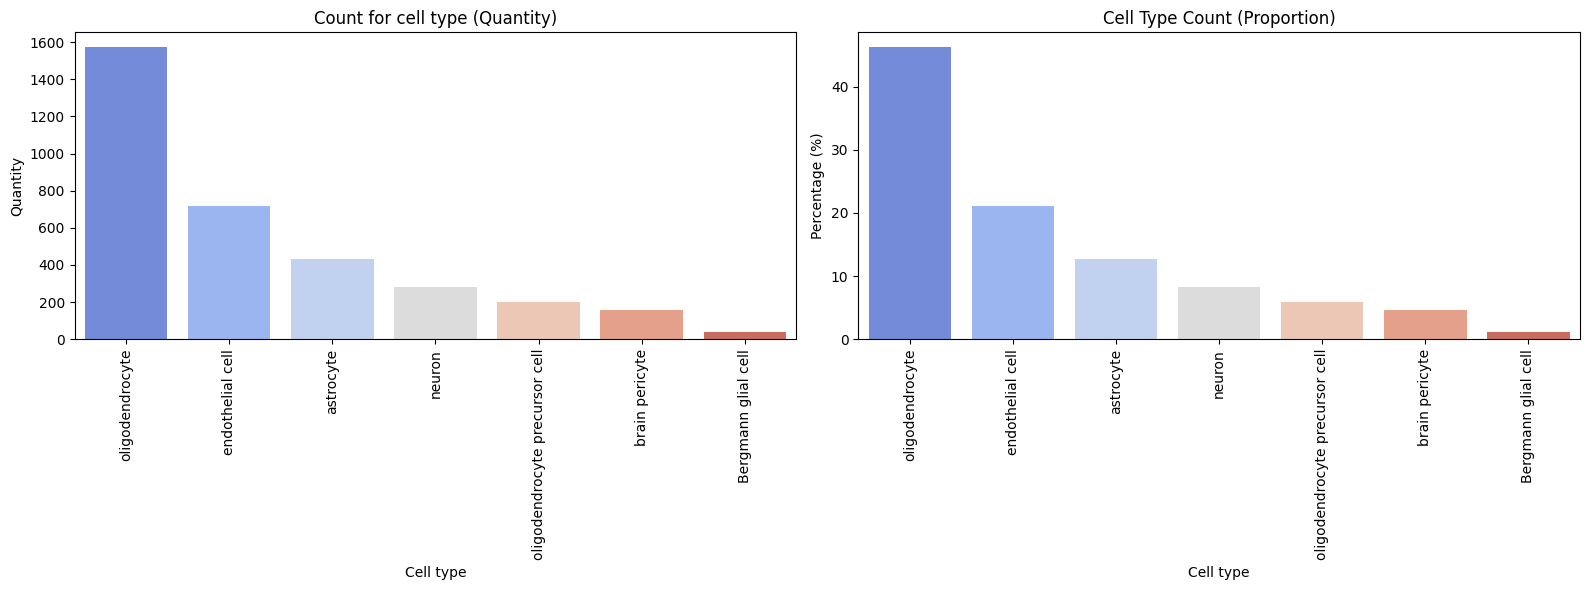

In [12]:
cell_type_counts = df_metadata["cell_ontology_class"].value_counts()
cell_type_percent = (cell_type_counts / cell_type_counts.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=cell_type_counts.index, y=cell_type_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Count for cell type (Quantity)")
axes[0].set_xlabel("Cell type")
axes[0].set_ylabel("Quantity")
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x=cell_type_percent.index, y=cell_type_percent.values, palette="coolwarm", ax=axes[1])
axes[1].set_title("Cell Type Count (Proportion)")
axes[1].set_xlabel("Cell type")
axes[1].set_ylabel("Percentage (%)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### Count and proportion of subtissue

- The left Chart "Subtissue Distribution (Quantity)" displays the absolute count of cells in different brain subtissues. The Cortex has the highest count, followed by the Hippocampus, Striatum, and Cerebellum, which has the lowest count. 

- The right chart "Proportion of Subtissue" represents the proportion of each subtissue relative to the total dataset. The Cortex accounts for the largest percentage (33.8%), followed by the Hippocampus (28.7%), Striatum (21.3%), and Cerebellum (16.3%). 

C:\Users\henry\AppData\Local\Temp\ipykernel_17604\2567555667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subtissue_type_counts.index, y=subtissue_type_counts.values, palette="coolwarm", ax=axes[0])


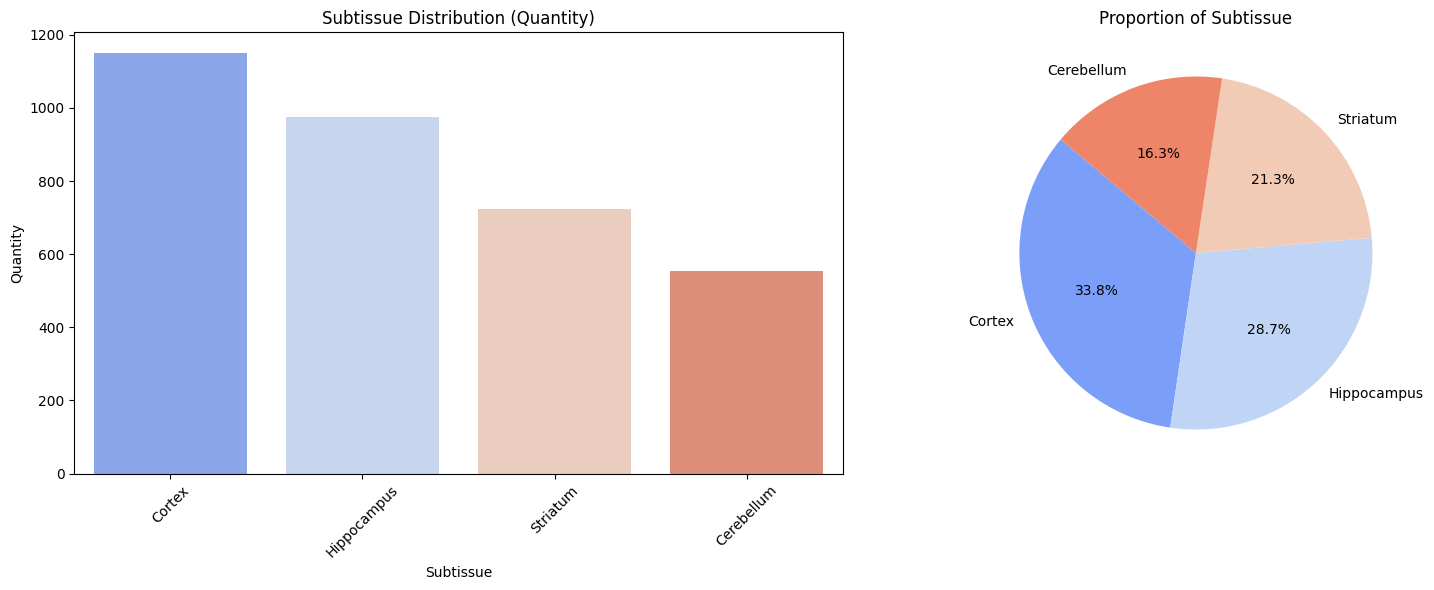

In [ ]:
subtissue_type_counts = df_metadata['subtissue'].value_counts()
subtissue_type_percent = (subtissue_type_counts / subtissue_type_counts.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.barplot(x=subtissue_type_counts.index, y=subtissue_type_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Subtissue Distribution (Quantity)")
axes[0].set_xlabel("Subtissue")
axes[0].set_ylabel("Quantity")
axes[0].tick_params(axis='x', rotation=45)

colors = sns.color_palette("coolwarm", len(subtissue_type_counts))  # Colores
axes[1].pie(subtissue_type_percent, labels=subtissue_type_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title("Proportion of Subtissue")

plt.tight_layout()
plt.show()


### Missing data

The missing data analysis shows that there is no missing data in any of the columns. Each column; cell, cell_ontology_class, subtissue, mouse.sex, mouse.id, and plate.barcode—has complete values, meaning there are no null or empty entries.

In [14]:
# To check missing data
print("\n🔍 Missing data in Metadata:")
print(df_metadata.isnull().sum())


🔍 Missing data in Metadata:
cell                   0
cell_ontology_class    0
subtissue              0
mouse.sex              0
mouse.id               0
plate.barcode          0
dtype: int64


### Statistical summary

**Key Observations:**

- ***Cell Ontology Class:*** There are 7 distinct cell types, with oligodendrocytes being the most frequent (1,574 occurrences).
- ***Subtissue Distribution:*** Cells are found in 4 different brain regions, with the Cortex being the most represented (1,149 occurrences).
- ***Sex Distribution:*** The dataset contains both male and female samples, but males (2,694) are more prevalent.
- ***Mouse ID:*** There are 7 unique mouse IDs, with mouse 3_10_M appearing most frequently (980 occurrences).
- ***Plate Barcode:*** A total of 41 different plate barcodes were used, with MAA000560 being the most common (287 occurrences).

In [15]:
# Statistical summary 
print("\n📈 Statistical summary:")
display(HTML(df_metadata.describe().to_html()))



📈 Statistical summary:


,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
count,3401,3401,3401,3401,3401,3401
unique,3401,7,4,2,7,41
top,A1.B003290.3_38_F.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560
freq,1,1574,1149,2694,980,287


There are also zero values in the gene expression matrix wich means that the matrix has full values.

In [16]:
# Null values
print("\n🔍 Null Values in the gene expresssion matrix:")
print(df_counts.isnull().sum().sum())


🔍 Null Values in the gene expresssion matrix:
0


### Analysis For each sex

The metadata information of the cells analyzed contains 2694 registers that belongs to male mice and 707 that belongs to female.

In [19]:
df_metadata_m = df_metadata[df_metadata['mouse.sex'] == 'M']
df_metadata_f = df_metadata[df_metadata['mouse.sex'] == 'F']

print('\n We filter by sex of the mouse and we get that: ')
print(f"🐭 Male: {df_metadata_m.shape[0]}")
print(f"🐭 Female: {df_metadata_f.shape[0]}")


 We filter by sex of the mouse and we get that: 
🐭 Male: 2694
🐭 Female: 707


The mice proportion in the dataset consist in 20.8% for female and 79,8% for male, wich is the greatest part.

C:\Users\henry\AppData\Local\Temp\ipykernel_17604\798154539.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="pastel", ax=axes[0])


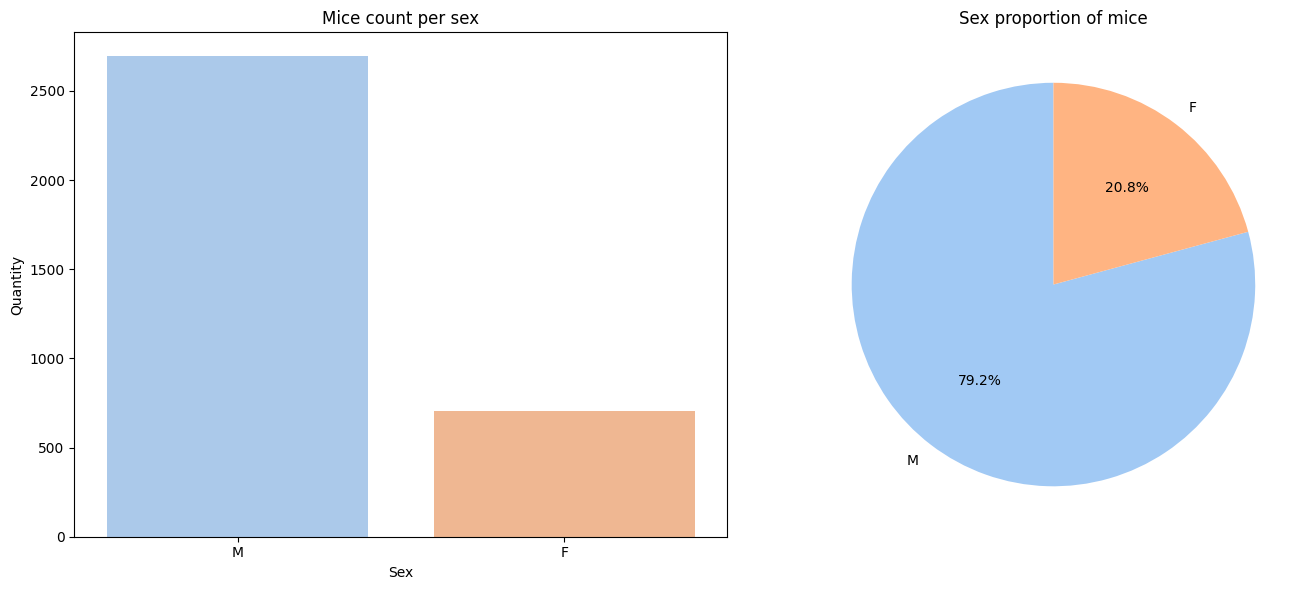

In [20]:
sex_counts = df_metadata['mouse.sex'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=sex_counts.index, y=sex_counts.values, palette="pastel", ax=axes[0])
axes[0].set_title("Mice count per sex")
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Quantity")

# Pie chart
axes[1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette("pastel", len(sex_counts)), startangle=90)
axes[1].set_title("Sex proportion of mice")

plt.tight_layout()
plt.show()

### Count and proportion of tissues type by sex

The male group has a significantly larger sample size compared to the female group, which is evident from the higher counts across all tissues.

- Males show a more skewed distribution, with Cortex having the highest sample count and the other tissues decreasing progressively.
- Females have a more balanced distribution among Cortex, Hippocampus, and Striatum, while Cerebellum remains the least represented in both groups.

While absolute counts are different, the relative proportions (percentages) provide a normalized view of tissue representation:
- Males have a higher proportion of **Cortex** samples (35.0%) compared to females (29.3%).
- **Striatum** is more represented in females (27.0%) than in males (19.7%).
- **Hippocampus** is nearly identical in both groups (~28%).
- **Cerebellum** has the lowest proportion in both, with a slight difference between males (16.5%) and females (15.3%). 

C:\Users\henry\AppData\Local\Temp\ipykernel_17604\2428431691.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tissue_counts_m.index, y=tissue_counts_m.values, palette="coolwarm", ax=axes[0, 0])
C:\Users\henry\AppData\Local\Temp\ipykernel_17604\2428431691.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tissue_counts_f.index, y=tissue_counts_f.values, palette="coolwarm", ax=axes[0, 1])


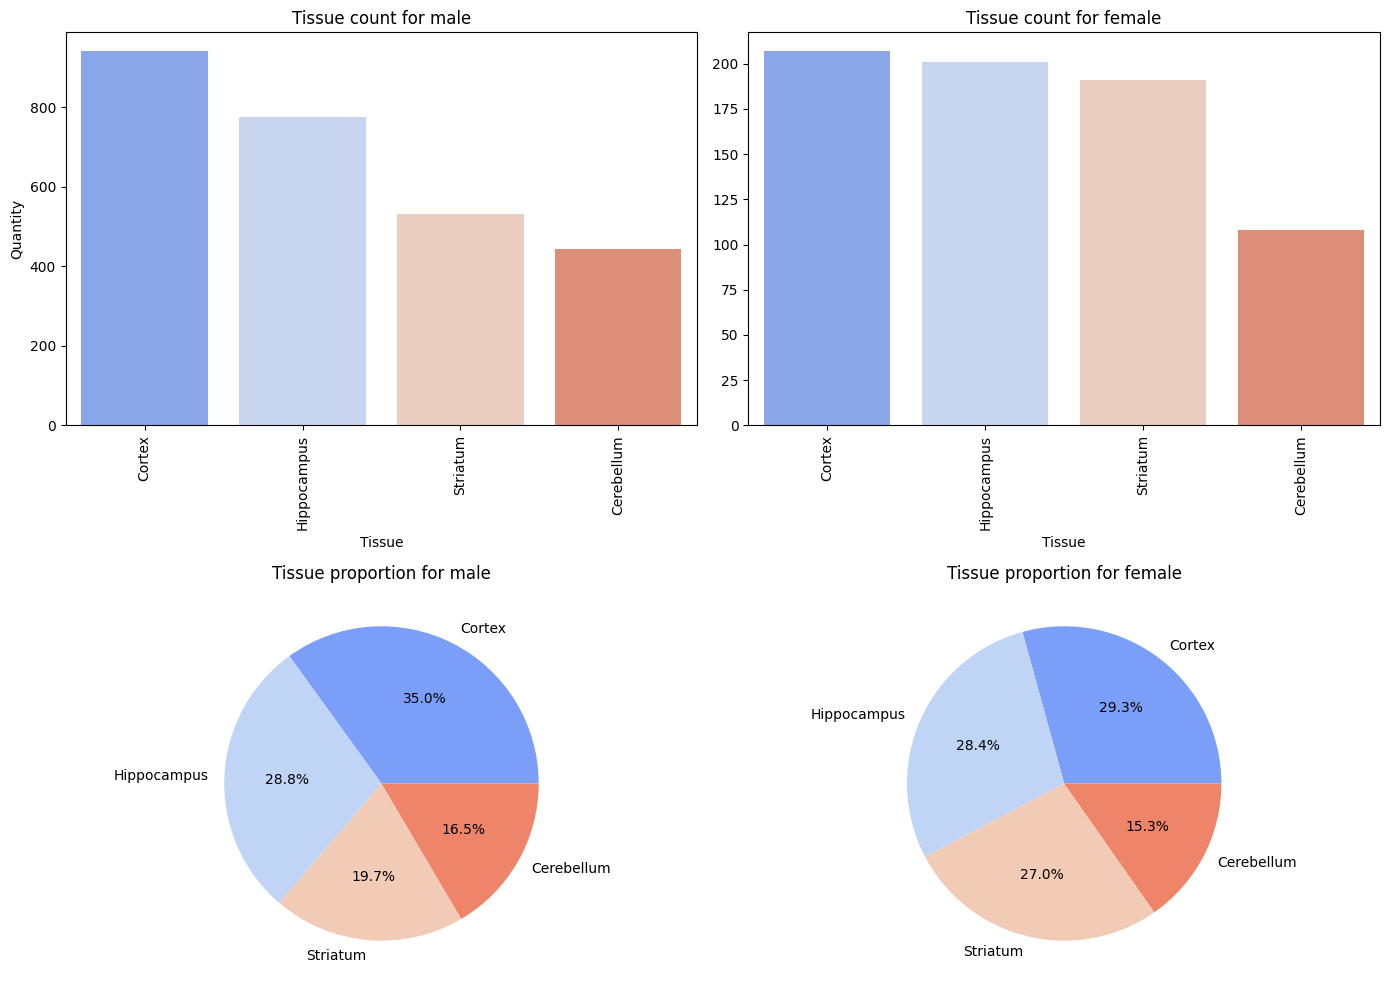

In [21]:
tissue_counts_m = df_metadata[df_metadata['mouse.sex'] == 'M']['subtissue'].value_counts()
tissue_counts_f = df_metadata[df_metadata['mouse.sex'] == 'F']['subtissue'].value_counts()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.barplot(x=tissue_counts_m.index, y=tissue_counts_m.values, palette="coolwarm", ax=axes[0, 0])
axes[0, 0].set_title("Tissue count for male")
axes[0, 0].set_xlabel("Tissue")
axes[0, 0].set_ylabel("Quantity")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=tissue_counts_f.index, y=tissue_counts_f.values, palette="coolwarm", ax=axes[0, 1])
axes[0, 1].set_title("Tissue count for female")
axes[0, 1].set_xlabel("Tissue")
axes[0, 1].tick_params(axis='x', rotation=90)

axes[1, 0].pie(tissue_counts_m.values, labels=tissue_counts_m.index, autopct='%1.1f%%', 
               colors=sns.color_palette("coolwarm", len(tissue_counts_m)))
axes[1, 0].set_title("Tissue proportion for male")

axes[1, 1].pie(tissue_counts_f.values, labels=tissue_counts_f.index, autopct='%1.1f%%', 
               colors=sns.color_palette("coolwarm", len(tissue_counts_f)))
axes[1, 1].set_title("Tissue proportion for female")

plt.tight_layout()
plt.show()

### Cell count by type

These information is divided into counts per cell type as followed: 

- *Oligodendrocytes* are the most numerous, with approximately 1,600 cells, making them the dominant cell type.
- *Endothelial cells* are the second most common, with about 700 cells, representing a significant portion of the dataset.
- *Astrocytes* account for roughly 430 cells, while neurons are less frequent, with around 280 cells.
- The remaining cell *types—oligodendrocyte* *precursor cells* (~200), *brain pericytes* (~150), and *Bergmann glial cells* (~40)—are comparatively rare.

**Statistical Insights**
- ***Skewed Distribution:*** The dataset is highly unbalanced, with oligodendrocytes being nearly twice as common as the next most frequent cell type (endothelial cells).
- ***Low Representation:*** Some cell types, such as Bergmann glial cells (1.2%) and brain pericytes (4.6%), have very few samples, which may impact statistical analyses if these groups are too small to generalize results.



C:\Users\henry\AppData\Local\Temp\ipykernel_17604\2006688091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="coolwarm", ax=axes[0])


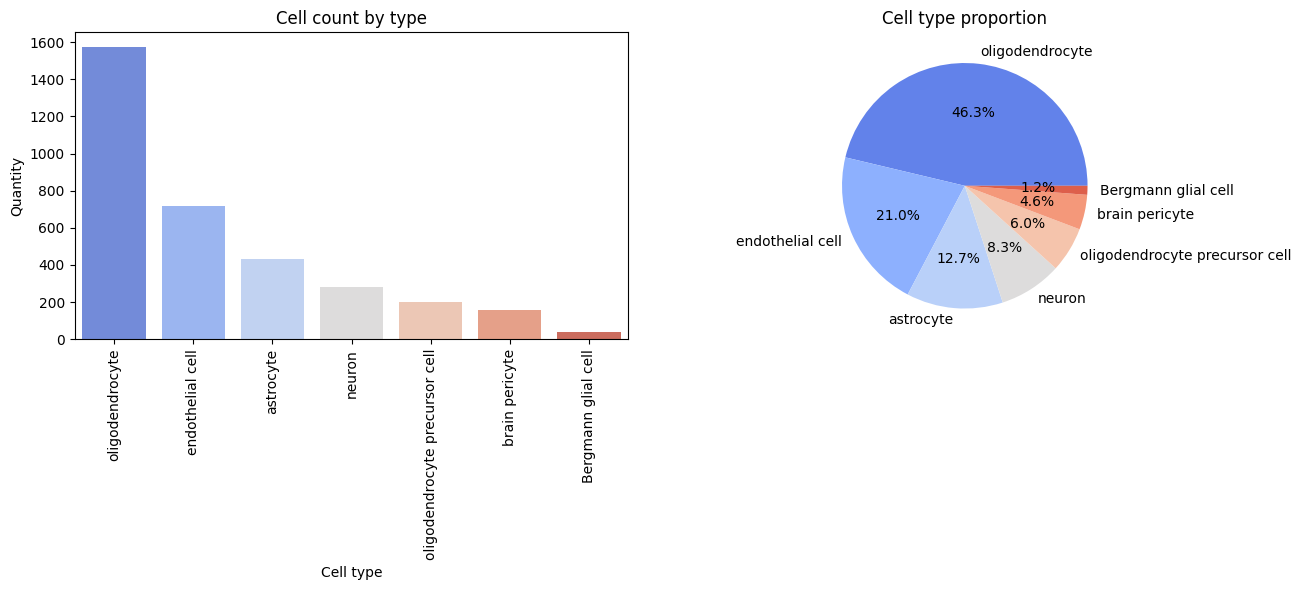

In [ ]:
cell_counts = df_metadata['cell_ontology_class'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=cell_counts.index, y=cell_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Cell count by type")
axes[0].set_xlabel("Cell type")
axes[0].set_ylabel("Quantity")
axes[0].tick_params(axis='x', rotation=90)

axes[1].pie(cell_counts.values, labels=cell_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette("coolwarm", len(cell_counts)))
axes[1].set_title("Cell type proportion")

plt.tight_layout()
plt.show()

### Cell count by tissue type

**Oligodendrocytes**
- Most abundant in Cortex (~580 cells), followed by Hippocampus (~470) and Striatum (~380).
- Least common in Cerebellum (~170).

**Endothelial Cells:**
- Highest in Hippocampus (~270), followed by Cerebellum (~190).
- Lower presence in Cortex (~140) and Striatum (~110).

**Astrocytes**:

- Predominantly found in Cortex (~260).
- Lower numbers in Hippocampus (~90), Striatum (~80), and Cerebellum (~10).

**Neurons**:

- More evenly distributed, with Striatum (~110) and Cerebellum (~100) having slightly higher counts.
- Cortex and Hippocampus have fewer neurons (~50 and ~30, respectively).

**Oligodendrocyte Precursor Cells:**

- Most present in Hippocampus (~100), with Cortex (~90) and Striatum (~50) having moderate counts.
- Least frequent in Cerebellum (~20).

**Brain Pericytes:**

- Found in all tissues in small amounts, with slightly more in Cortex (~80) and Cerebellum (~70).

**Bergmann Glial Cells:**

- Almost exclusive to Cerebellum (~60), with negligible counts in other tissues.

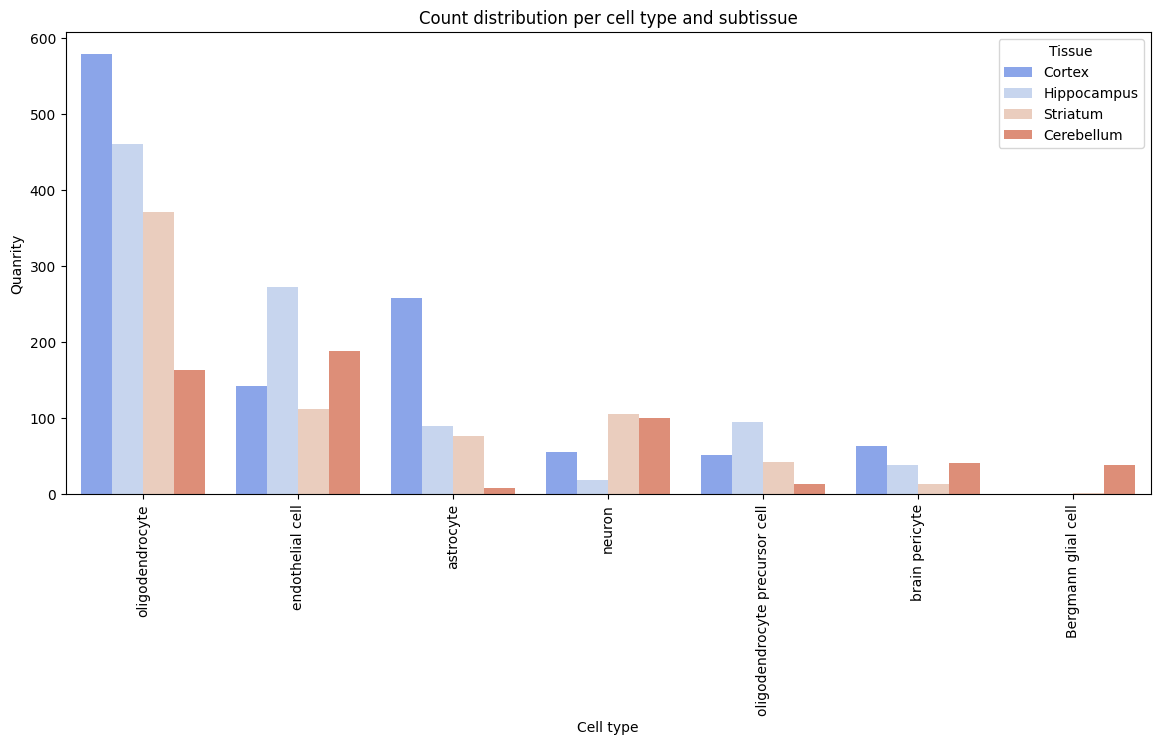

In [ ]:
tissue_by_cell = df_metadata.groupby(['cell_ontology_class', 'subtissue']).size().reset_index(name='count')
tissue_by_cell = tissue_by_cell.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=tissue_by_cell, 
    x='cell_ontology_class', 
    y='count', 
    hue='subtissue', 
    palette='coolwarm', 
    order=tissue_by_cell.groupby('cell_ontology_class')['count'].sum().sort_values(ascending=False).index
)

# Personalizar etiquetas
plt.title("Count distribution per cell type and subtissue")
plt.xlabel("Cell type")
plt.ylabel("Quanrity")
plt.xticks(rotation=90)
plt.legend(title="Tissue")

plt.show()

### Heatmap of gene expression

This heatmap represents the gene expression levels of a randomly selected subset of 20 genes across 20 different cells. The color intensity in the heatmap indicates the level of gene expression, where:

- Dark blue (low values) represents little to no gene expression.
- Light blue to red (higher values) indicates increased expression levels, with red showing the highest expression values.

There are 4 genes that have a representative high level of expresion into some of the cells, being HNRNPH2 with the hihgest level of expression for an specific one and repetitively high expression grades for more than one copared to the others.

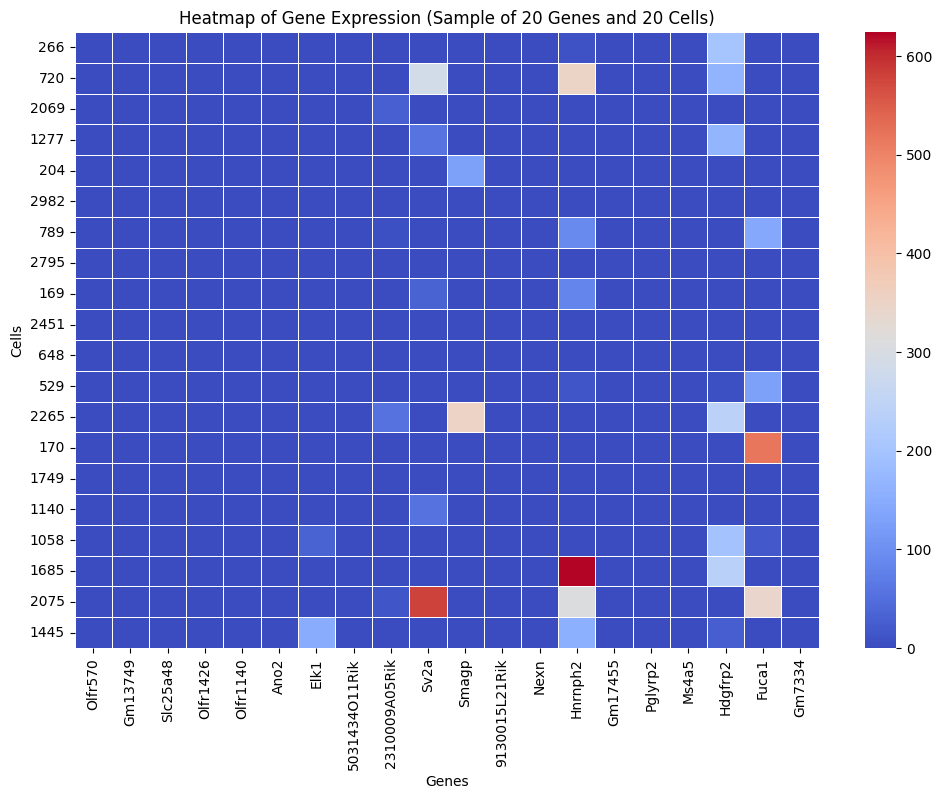

In [ ]:
# Random Gene and cell selection
sample_genes = df_counts.sample(n=20, axis=1)  # We select randomly 20 genes
sample_cells = sample_genes.sample(n=20, axis=0)  # We select randomly 20 cells

# Heat map
plt.figure(figsize=(12, 8))
sns.heatmap(sample_cells, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Gene Expression (Sample of 20 Genes and 20 Cells)")
plt.xlabel("Genes")
plt.ylabel("Cells")
plt.show()